In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(
  'ignore'
)

In [2]:
X, y_true = make_moons(
  n_samples=500,
  noise=0.05,
  random_state=42
)

X.shape, y_true.shape

((500, 2), (500,))

In [3]:
X

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [4]:
df = pd.DataFrame(
  X, columns=['Feature_1', 'Feature_2']
)
df

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [5]:
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(df)

In [6]:
inertia = []
K_range = range(1, 15)

for k in K_range:
  kmeans = KMeans(
    n_clusters=k,
    random_state=42
  )
  
  kmeans.fit(X_scaled)
  
  inertia.append(kmeans.inertia_)
inertia

[1000.0000000000009,
 416.092442998355,
 329.6335675085839,
 200.861958950922,
 156.3214639343491,
 116.62507071398792,
 93.04486529013793,
 79.1962170369731,
 56.00470019373601,
 41.847040961759575,
 36.760353124380146,
 32.156180635156836,
 27.941579531727683,
 25.58124995707979]

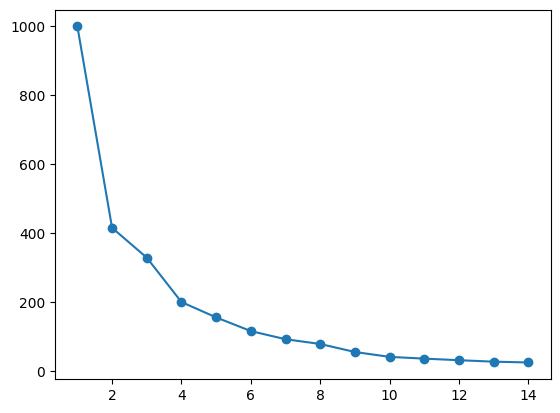

In [7]:
plt.plot(K_range, inertia, marker='o')
plt.savefig('Elbow_curve.png')
plt.show()

In [8]:
kmeans_final = KMeans(
  n_clusters=3,
  random_state=42
)

cluster_labels = kmeans_final.fit_predict(X_scaled)

In [9]:
df['cluster'] = cluster_labels

In [10]:
df

,Feature_1,Feature_2,cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,2
4,0.293226,1.057185,0
...,...,...,...
495,0.239754,0.985462,0
496,0.072145,0.184834,2
497,0.590273,-0.365577,1
498,1.619465,-0.283658,1


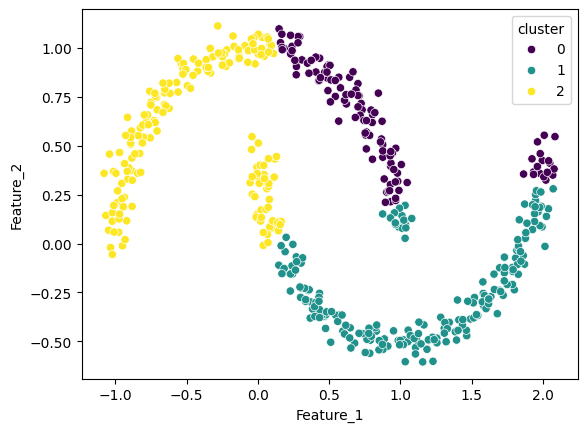

In [11]:
sns.scatterplot(
  x='Feature_1',
  y='Feature_2',
  hue='cluster',
  data=df,
  palette='viridis'
)

plt.savefig('CLuster.png')
plt.show()

In [12]:
dbscan = DBSCAN(
  eps=0.3,
  min_samples=5
)

dbscan_labels = dbscan.fit_predict(X_scaled)

df['dbscan_cluster'] = dbscan_labels
df

,Feature_1,Feature_2,cluster,dbscan_cluster
0,0.830586,-0.447733,1,0
1,0.701678,0.816918,0,1
2,1.022080,-0.492571,1,0
3,-0.316765,0.953438,2,1
4,0.293226,1.057185,0,1
...,...,...,...,...
495,0.239754,0.985462,0,1
496,0.072145,0.184834,2,0
497,0.590273,-0.365577,1,0
498,1.619465,-0.283658,1,0


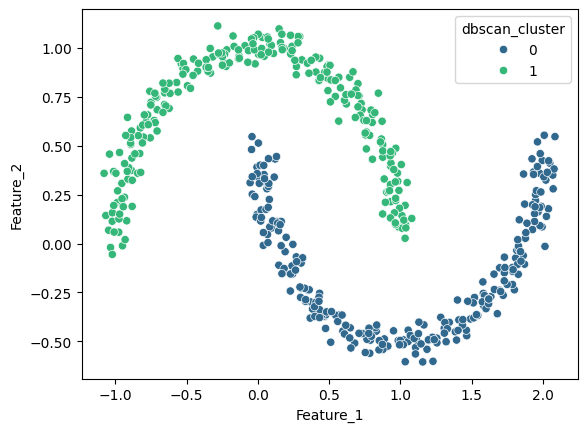

In [13]:
sns.scatterplot(
  x='Feature_1',
  y='Feature_2',
  hue='dbscan_cluster',
  data=df,
  palette='viridis'
)

plt.savefig('DBSCAN_CLuster.png')
plt.show()